# Regression - Case Studies

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Regression Class

In [2]:
class regression():
    def __init__(self, degree):
        self.degree = degree
            
    def random_data(self, X=None, c=None, b=None, 
                         degree=3, num_points=300, 
                         X_lower=-10, X_higher=10, 
                         c_lower=-3, c_higher=3,
                         noise=True, noise_mu=0, 
                         noise_sigma=50, plot=False):

        def func(x, c): 
            return sum([c[i] * x**i for i in range(len(c))])

        if X == None: 
            self.X = np.random.uniform(X_lower, X_higher, num_points)
        if c == None: 
            self.c = [np.random.uniform(c_lower, c_higher) for _ in range(degree + 1)]

        self.y = np.array( [func(self.X[i], self.c) for i in range(num_points)] )

        if noise: 
            noise = np.random.normal(noise_mu, noise_sigma, num_points)
            self.y = [i + j for i, j in zip(self.y, noise)]

        if plot:
            plt.scatter(self.X, self.y, s = 5)
            plt.show()
        
        return self.X, self.y
            
    def split(self, X, y):
        x_tr, y_tr = np.array(X[:len(X)*3//4]), np.array(y[:len(y)*3//4])
        x_val, y_val = np.array(X[len(X)*3//4:]), np.array(y[len(y)*3//4:])
        
        return x_tr, y_tr, x_val, y_val

    def train(self, x, y):
        A = np.linalg.inv(np.array( 
            [ [sum(np.power(x, i)) for i in range(j, self.degree + 1 + j)] for j in range(self.degree + 1) ]
        ))

        self.W = np.dot(A, np.array( [ sum(y * np.power(x, i)) for i in range(self.degree+1) ] ))
    
    def predict(self, x):
        self.pred = sum([self.W[i] * x**i for i in range(len(self.W))])
        return self.pred
    
    def plot_data_vs_estimation(self, x, y, pred):
        plt.scatter(x, y, s = 3, label = 'True Value')
        plt.scatter(x, pred, s = 5, label = 'Prediction')
        plt.legend()
        plt.show()
        
    def RSE(self, y, g): 
        return sum(np.square(y - g)) / sum(np.square(y - 1 / len(y)*sum(y)))

## Working with Small Dataset

Let us create a small set of data which would obey to a 3rd degree polynomial function, but with some added noise.

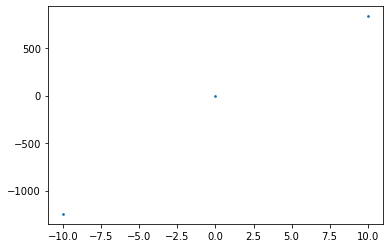

In [5]:
def func(x):
    return x**3 - 2 * x**2 + 4 * x - 5

X = np.linspace(-10, 10, 3)
y = np.array( [func(x) for x in X] )

plt.scatter(X, y, s = 3)

### Sinusoidal Data

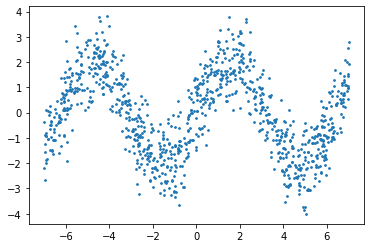

In [9]:
X = np.random.uniform(-7, 7, 1000)
y = 2 * np.sin(X)

y = y + np.random.normal(0, 0.8, 1000)

plt.scatter(X, y, s = 3)

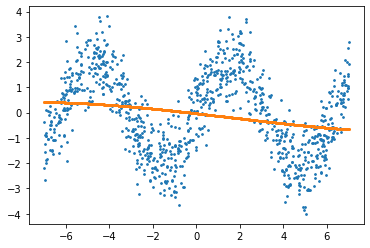

In [12]:
r = regression(degree = 3)
r.train(X, y)
g = r.predict(X)

plt.scatter(X, y, s = 3)
plt.scatter(X, g, s = 3)

### Fibonacci Data

Error: 0.030341911869131266


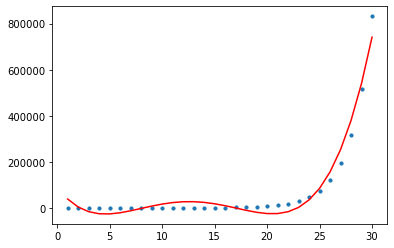

In [35]:
from functools import reduce
fib = lambda n: reduce(lambda x,n:[x[1],x[0]+x[1]], range(n),[0,1])[0]

X = np.linspace(1, 30, 30)
y = np.array([fib(int(i)) for i in X])

r = regression(degree = 4)
r.train(X, y)
g = r.predict(X)

plt.scatter(X, y, s = 10)
plt.plot(X, g, 'r')

print('Error: {}'.format(r.RSE(y, g)))

### Projectile Motion Data